In [11]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plant = pd.read_csv("data/21.savedata_plant/plant.csv")
plant.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC
0,2016-04-01 00:00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
1,2016-04-01 00:00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
2,2016-04-01 00:00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
3,2016-04-01 03:00:00,1,1,14.0,28.0,10.0,7.0,59.0,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0
4,2016-04-01 03:00:00,1,2,12.0,32.0,9.0,7.0,59.0,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0


In [12]:
plant["MEA_DDHR"] = pd.to_datetime(plant['MEA_DDHR'])

In [13]:
plant["YEAR"] = plant["MEA_DDHR"].dt.year

In [14]:
plant.loc[plant["COND_LOC"] == 1]

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,YEAR
131,2016-04-06 09:00:00,1,3,13.00,84.00,11.00,11.00,45.00,1.0,2016-04-07 09:00:00,0.0,2016-04-08 09:00:00,1.0,2016
178,2016-04-08 09:00:00,1,2,13.00,80.00,10.00,9.00,75.00,1.0,2016-04-09 09:00:00,1.0,2016-04-10 09:00:00,0.0,2016
179,2016-04-08 09:00:00,1,3,12.00,82.00,9.00,9.00,75.00,1.0,2016-04-09 09:00:00,1.0,2016-04-10 09:00:00,0.0,2016
182,2016-04-08 12:00:00,1,3,13.00,80.00,10.00,12.00,63.00,1.0,2016-04-09 12:00:00,0.0,2016-04-10 12:00:00,0.0,2016
197,2016-04-09 03:00:00,1,3,13.00,77.00,10.00,9.00,80.00,1.0,2016-04-10 03:00:00,0.0,2016-04-11 03:00:00,0.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339962,2019-03-21 03:10:00,1,3,12.38,83.12,10.25,9.36,93.19,1.0,2019-03-22 03:10:00,0.0,2019-03-23 03:10:00,0.0,2019
339967,2019-03-21 03:20:00,1,2,12.38,82.26,10.37,9.15,93.25,1.0,2019-03-22 03:20:00,0.0,2019-03-23 03:20:00,0.0,2019
339968,2019-03-21 03:20:00,1,3,12.29,82.88,10.25,9.15,93.25,1.0,2019-03-22 03:20:00,0.0,2019-03-23 03:20:00,0.0,2019
339973,2019-03-21 03:30:00,1,2,12.35,81.87,10.25,9.11,93.41,1.0,2019-03-22 03:30:00,0.0,2019-03-23 03:30:00,0.0,2019


# 년도 별 결로 발생 분포

In [15]:
cond = plant.loc[plant["COND_LOC"] == 1]
cond.groupby("YEAR").count()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC
YEAR,,,,,,,,,,,,,
2016,68,68,68,68,68,68,68,68,68,68,68,68,68
2017,293,293,293,293,293,293,293,293,293,293,293,293,293
2018,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270
2019,348,348,348,348,348,348,348,348,348,348,348,348,348


In [16]:
plant["MONTH"] = plant["MEA_DDHR"].dt.month

In [17]:
plant.head(3)

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,YEAR,MONTH
0,2016-04-01,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,2016,4
1,2016-04-01,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,2016,4
2,2016-04-01,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,2016,4


In [18]:
plant["YEAR"] = plant["YEAR"].map(lambda x : str(x))
plant["MONTH"] = plant["MONTH"].map(lambda x : str(x))
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,YEAR,MONTH
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,2016,4
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,2016,4
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,2016,4
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,2016,4
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,2016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2,2,9.02,38.49,9.68,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,2019,3
349313,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,2019,3
349314,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,2019,3
349315,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,2019,3


In [34]:
plant["YEAR_MONTH"] = plant["YEAR"] +"-"+ plant["MONTH"]
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,YEAR,MONTH,YEAR_MONTH
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,2016,4,2016-4
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,2016,4,2016-4
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,2016,4,2016-4
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,2016,4,2016-4
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,2016,4,2016-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2,2,9.02,38.49,9.68,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,2019,3,2019-3
349313,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,2019,3,2019-3
349314,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,2019,3,2019-3
349315,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,2019,3,2019-3


In [35]:
cond = plant.loc[plant["COND_LOC"] == 1]
cond

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,YEAR,MONTH,YEAR_MONTH
131,2016-04-06 09:00:00,1,3,13.00,84.00,11.00,11.00,45.00,1.0,2016-04-07 09:00:00,0.0,2016-04-08 09:00:00,1.0,2016,4,2016-4
178,2016-04-08 09:00:00,1,2,13.00,80.00,10.00,9.00,75.00,1.0,2016-04-09 09:00:00,1.0,2016-04-10 09:00:00,0.0,2016,4,2016-4
179,2016-04-08 09:00:00,1,3,12.00,82.00,9.00,9.00,75.00,1.0,2016-04-09 09:00:00,1.0,2016-04-10 09:00:00,0.0,2016,4,2016-4
182,2016-04-08 12:00:00,1,3,13.00,80.00,10.00,12.00,63.00,1.0,2016-04-09 12:00:00,0.0,2016-04-10 12:00:00,0.0,2016,4,2016-4
197,2016-04-09 03:00:00,1,3,13.00,77.00,10.00,9.00,80.00,1.0,2016-04-10 03:00:00,0.0,2016-04-11 03:00:00,0.0,2016,4,2016-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339962,2019-03-21 03:10:00,1,3,12.38,83.12,10.25,9.36,93.19,1.0,2019-03-22 03:10:00,0.0,2019-03-23 03:10:00,0.0,2019,3,2019-3
339967,2019-03-21 03:20:00,1,2,12.38,82.26,10.37,9.15,93.25,1.0,2019-03-22 03:20:00,0.0,2019-03-23 03:20:00,0.0,2019,3,2019-3
339968,2019-03-21 03:20:00,1,3,12.29,82.88,10.25,9.15,93.25,1.0,2019-03-22 03:20:00,0.0,2019-03-23 03:20:00,0.0,2019,3,2019-3
339973,2019-03-21 03:30:00,1,2,12.35,81.87,10.25,9.11,93.41,1.0,2019-03-22 03:30:00,0.0,2019-03-23 03:30:00,0.0,2019,3,2019-3


In [38]:
cond_count=cond[["YEAR_MONTH", "COND_LOC"]].groupby("YEAR_MONTH").count()
cond_count.index = pd.to_datetime(cond_count.index)

In [45]:
cond_count.sort_index(inplace=True)


In [65]:
cond_count.index = cond_count.index.astype(str).map(lambda x : x[:7])
cond_count

,COND_LOC
YEAR_MONTH,
2016-04,18
2016-05,3
2016-06,5
2016-07,1
2016-10,3
2016-11,8
2016-12,30
2017-01,40
2017-02,94


In [73]:
from IPython.core.display import display, HTML
display(HTML("<style>.contaniner { width:100% !important;}</style>"))
pd.options.display.max_columns = 999
import matplotlib.font_manager as fm
import matplotlib as mpl
print ('설정 파일 위치: ', mpl.matplotlib_fname())
mpl.rcParams['axes.unicode_minus'] =False
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[:]
plt.rcParams["font.family"] = 'Malgun Gothic'

설정 파일 위치:  C:\Users\silen\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


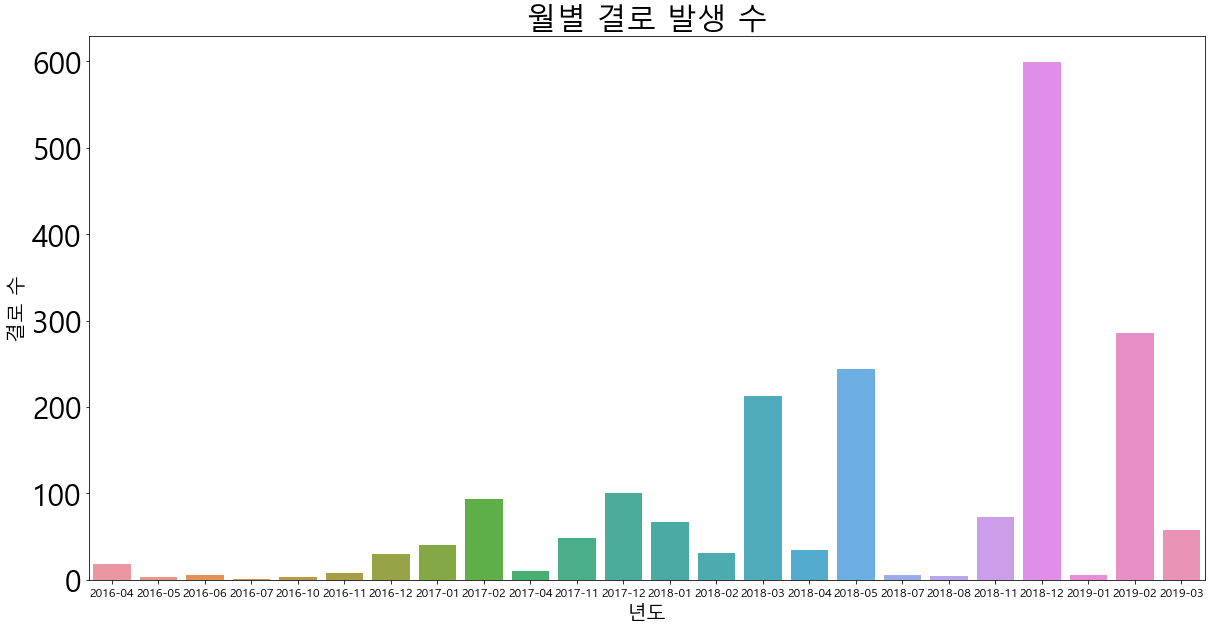

In [126]:
plt.figure(figsize=(20,10))
sns.barplot(x=cond_count.index,y="COND_LOC" ,data=cond_count)
plt.title("월별 결로 발생 수", fontsize=30)
plt.xlabel("년도",  fontsize=20)
plt.ylabel("결로 수" ,fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=30)
plt.show()

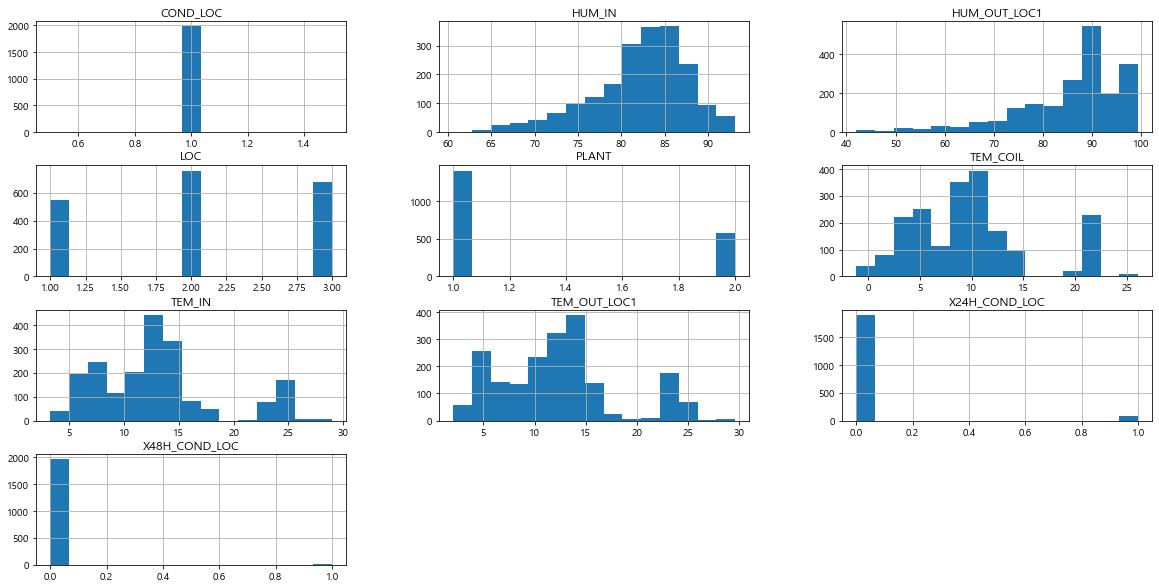

In [81]:
cond.hist(bins= 15, figsize=(20,10))
plt.show()

No handles with labels found to put in legend.


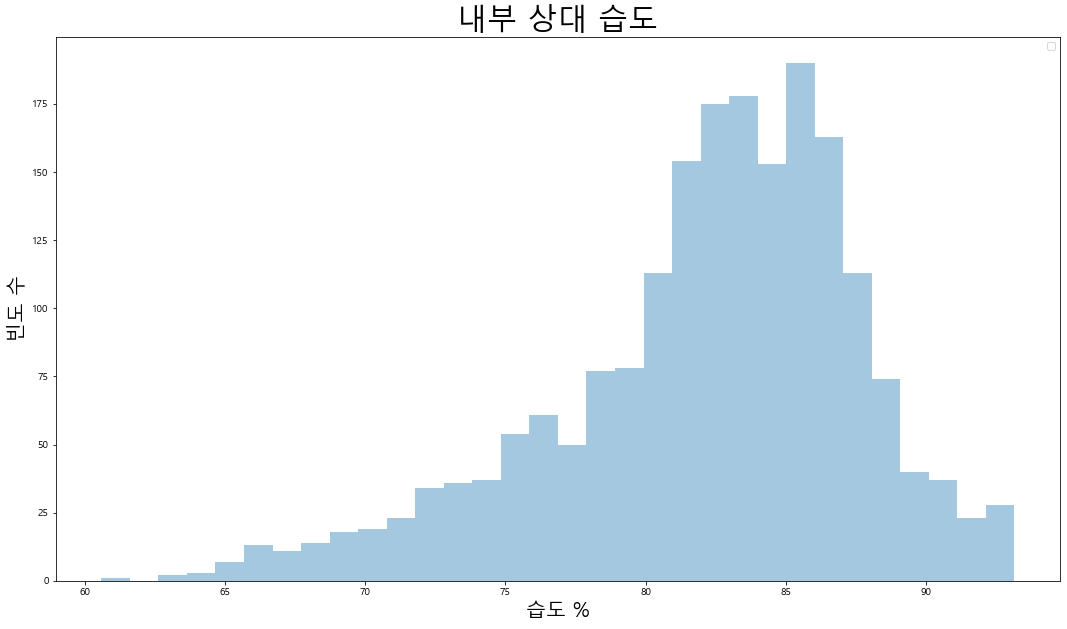

In [116]:
plt.figure(figsize=(18,10))
sns.distplot(cond["HUM_IN"], kde=False)
plt.title("내부 상대 습도", fontsize=30)
plt.xlabel("습도 %",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.legend()
plt.show()

No handles with labels found to put in legend.


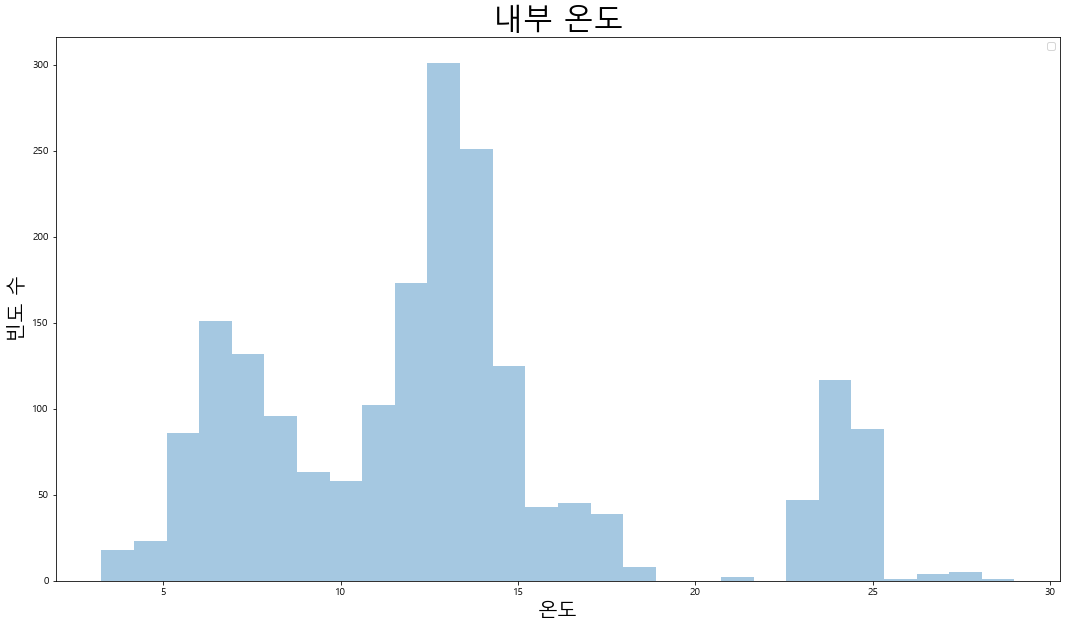

In [114]:
plt.figure(figsize=(18,10))
sns.distplot(cond["TEM_IN"], kde=False)
plt.title("내부 온도", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.legend()
plt.show()

In [102]:
plt.figure(figsize=(18,10))
sns.distplot(cond["HUM_IN"], kde=False)
plt.title("내부 상대 습도", fontsize=30)
plt.xlabel("습도 %",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.legend()
plt.show()

TypeError: distplot() got an unexpected keyword argument 'x'

<Figure size 1296x720 with 0 Axes>

### category =["TEM_COIL", "TEM_IN","HUM_IN"]

In [ ]:
cond.loc[cond["YEAR_MONTH"] == "2018_"]

In [112]:
category=["TEM_IN", "HUM_IN", "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1"]

In [113]:
plant[category].loc[plant["YEAR_MONTH"] == "2018_11"].describe()

,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1
count,25830.000000,25830.000000,25830.000000,25830.000000,25830.000000
mean,12.848461,50.954707,12.500985,9.484057,62.459964
std,2.713587,14.677894,2.279594,4.110546,20.761924
min,5.570000,14.440000,6.670000,-0.100000,10.500000
25%,10.790000,40.140000,10.940000,6.310000,45.970000
50%,12.780000,51.830000,12.730000,9.050000,62.300000
75%,15.010000,61.970000,14.260000,12.750000,80.100000
max,19.160000,87.910000,18.190000,22.150000,99.360000


In [115]:
cond[category].loc[cond["YEAR_MONTH"] == "2018_11"].describe()

,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,15.051781,81.535342,12.492603,14.188219,82.647123
std,1.938589,4.926254,2.923187,1.569666,7.583766
min,12.560000,73.110000,8.990000,11.890000,67.060000
25%,12.870000,76.190000,9.150000,12.470000,75.850000
50%,16.350000,84.430000,14.830000,14.980000,86.390000
75%,16.750000,85.590000,14.980000,15.710000,87.940000
max,17.110000,87.910000,15.520000,15.950000,99.210000


In [116]:
cond[category].loc[cond["YEAR_MONTH"] == "2018_12"].describe()

,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1
count,599.000000,599.000000,599.000000,599.000000,599.000000
mean,13.209098,86.292988,10.215526,12.878948,91.869866
std,0.929056,3.481292,1.145306,1.554049,4.946509
min,11.310000,75.240000,8.310000,9.760000,83.420000
25%,12.690000,84.620000,9.355000,11.590000,88.490000
50%,13.240000,86.630000,10.060000,13.140000,89.840000
75%,13.790000,88.520000,11.130000,14.135000,99.270000
max,15.400000,93.160000,13.000000,15.190000,99.360000


In [114]:
plant[category].loc[plant["YEAR_MONTH"] == "2018_12"].describe()

,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1
count,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000
mean,5.503336,44.037332,5.044326,1.762001,55.252586
std,3.907566,13.552688,3.397289,5.273688,16.549606
min,-5.170000,18.100000,-2.910000,-10.360000,20.050000
25%,2.370000,34.280000,2.660000,-2.180000,43.830000
50%,5.510000,41.480000,4.990000,1.670000,53.510000
75%,8.320000,51.740000,7.390000,5.090000,65.230000
max,15.400000,93.160000,14.140000,15.190000,99.390000


In [109]:
cond.loc[cond["YEAR_MONTH"] == "2018_11"].describe()

,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_COND_LOC,X48H_COND_LOC
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0,73.0,73.0
mean,1.013699,2.534247,15.051781,81.535342,12.492603,14.188219,82.647123,1.0,0.0,0.0
std,0.117041,0.502278,1.938589,4.926254,2.923187,1.569666,7.583766,0.0,0.0,0.0
min,1.000000,2.000000,12.560000,73.110000,8.990000,11.890000,67.060000,1.0,0.0,0.0
25%,1.000000,2.000000,12.870000,76.190000,9.150000,12.470000,75.850000,1.0,0.0,0.0
50%,1.000000,3.000000,16.350000,84.430000,14.830000,14.980000,86.390000,1.0,0.0,0.0
75%,1.000000,3.000000,16.750000,85.590000,14.980000,15.710000,87.940000,1.0,0.0,0.0
max,2.000000,3.000000,17.110000,87.910000,15.520000,15.950000,99.210000,1.0,0.0,0.0


In [89]:
cond.loc[cond["YEAR_MONTH"] == "2018_12"].describe()

,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_COND_LOC,X48H_COND_LOC
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.0,599.000000,599.0
mean,1.292154,1.913189,13.209098,86.292988,10.215526,12.878948,91.869866,1.0,0.003339,0.0
std,0.455133,0.790290,0.929056,3.481292,1.145306,1.554049,4.946509,0.0,0.057735,0.0
min,1.000000,1.000000,11.310000,75.240000,8.310000,9.760000,83.420000,1.0,0.000000,0.0
25%,1.000000,1.000000,12.690000,84.620000,9.355000,11.590000,88.490000,1.0,0.000000,0.0
50%,1.000000,2.000000,13.240000,86.630000,10.060000,13.140000,89.840000,1.0,0.000000,0.0
75%,2.000000,3.000000,13.790000,88.520000,11.130000,14.135000,99.270000,1.0,0.000000,0.0
max,2.000000,3.000000,15.400000,93.160000,13.000000,15.190000,99.360000,1.0,1.000000,0.0


In [87]:
cond.loc[cond["YEAR_MONTH"] == "2019_1"]

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,YEAR,MONTH,YEAR_MONTH
275327,2019-01-05 01:30:00,1,3,3.93,73.38,0.52,2.55,75.40,1.0,2019-01-06 01:30:00,0.0,2019-01-07 01:30:00,0.0,2019,1,2019_1
275333,2019-01-05 01:40:00,1,3,3.93,73.87,0.48,2.37,76.10,1.0,2019-01-06 01:40:00,0.0,2019-01-07 01:40:00,0.0,2019,1,2019_1
275339,2019-01-05 01:50:00,1,3,3.93,73.78,0.60,2.19,76.71,1.0,2019-01-06 01:50:00,0.0,2019-01-07 01:50:00,0.0,2019,1,2019_1
275345,2019-01-05 02:00:00,1,3,3.96,73.50,0.48,2.16,77.08,1.0,2019-01-06 02:00:00,0.0,2019-01-07 02:00:00,0.0,2019,1,2019_1
275351,2019-01-05 02:10:00,1,3,4.02,72.80,0.48,2.37,74.45,1.0,2019-01-06 02:10:00,0.0,2019-01-07 02:10:00,0.0,2019,1,2019_1


In [88]:
cond.loc[cond["YEAR_MONTH"] == "2019_2"]

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,YEAR,MONTH,YEAR_MONTH
300398,2019-02-03 04:20:00,1,3,5.18,79.33,2.70,3.16,86.36,1.0,2019-02-04 04:20:00,0.0,2019-02-05 04:20:00,0.0,2019,2,2019_2
300404,2019-02-03 04:30:00,1,3,5.39,77.96,2.70,3.22,86.94,1.0,2019-02-04 04:30:00,0.0,2019-02-05 04:30:00,0.0,2019,2,2019_2
300410,2019-02-03 04:40:00,1,3,5.33,77.93,2.70,3.22,87.42,1.0,2019-02-04 04:40:00,0.0,2019-02-05 04:40:00,0.0,2019,2,2019_2
300416,2019-02-03 04:50:00,1,3,5.33,78.69,2.77,3.25,87.88,1.0,2019-02-04 04:50:00,0.0,2019-02-05 04:50:00,0.0,2019,2,2019_2
300422,2019-02-03 05:00:00,1,3,5.33,79.55,2.77,3.28,88.37,1.0,2019-02-04 05:00:00,0.0,2019-02-05 05:00:00,0.0,2019,2,2019_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301004,2019-02-03 21:10:00,1,3,6.52,80.62,3.96,5.02,83.52,1.0,2019-02-04 21:10:00,0.0,2019-02-05 21:10:00,0.0,2019,2,2019_2
301009,2019-02-03 21:20:00,1,2,7.47,78.75,4.83,4.90,83.55,1.0,2019-02-04 21:20:00,0.0,2019-02-05 21:20:00,0.0,2019,2,2019_2
301010,2019-02-03 21:20:00,1,3,6.49,81.35,3.99,4.90,83.55,1.0,2019-02-04 21:20:00,0.0,2019-02-05 21:20:00,0.0,2019,2,2019_2
301016,2019-02-03 21:30:00,1,3,6.40,80.07,3.96,4.84,83.09,1.0,2019-02-04 21:30:00,0.0,2019-02-05 21:30:00,0.0,2019,2,2019_2


In [90]:
cond.loc[cond["YEAR_MONTH"] == "2017_12"].describe()

,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_COND_LOC,X48H_COND_LOC
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.000000,101.0
mean,1.148515,2.366337,7.792574,76.555050,4.237426,7.243762,75.506040,1.0,0.118812,0.0
std,0.357383,0.731065,1.338450,4.331395,1.215082,2.335472,9.684684,0.0,0.325181,0.0
min,1.000000,1.000000,3.680000,66.480000,-0.810000,3.190000,55.680000,1.0,0.000000,0.0
25%,1.000000,2.000000,6.640000,73.750000,3.770000,5.120000,68.620000,1.0,0.000000,0.0
50%,1.000000,3.000000,7.890000,76.500000,4.380000,7.860000,75.370000,1.0,0.000000,0.0
75%,1.000000,3.000000,8.810000,80.040000,4.990000,8.840000,83.910000,1.0,0.000000,0.0
max,2.000000,3.000000,10.270000,85.040000,6.740000,11.500000,98.900000,1.0,1.000000,0.0


In [84]:
cond.loc[cond["YEAR_MONTH"] == "2016_12"]

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,YEAR,MONTH,YEAR_MONTH
9088,2016-12-05 09:00:00,1,2,10.76,81.29,8.04,11.37,74.76,1.0,2016-12-06 09:00:00,0.0,2016-12-07 09:00:00,0.0,2016,12,2016_12
9089,2016-12-05 09:00:00,1,3,10.31,84.68,7.77,11.37,74.76,1.0,2016-12-06 09:00:00,0.0,2016-12-07 09:00:00,0.0,2016,12,2016_12
9767,2016-12-19 12:00:00,1,3,9.36,75.92,6.21,10.18,67.64,1.0,2016-12-20 12:00:00,0.0,2016-12-21 12:00:00,0.0,2016,12,2016_12
9772,2016-12-19 15:00:00,1,2,11.68,72.56,7.62,12.38,67.61,1.0,2016-12-20 15:00:00,0.0,2016-12-21 15:00:00,0.0,2016,12,2016_12
9773,2016-12-19 15:00:00,1,3,11.34,75.98,6.74,12.38,67.61,1.0,2016-12-20 15:00:00,0.0,2016-12-21 15:00:00,0.0,2016,12,2016_12
9778,2016-12-19 18:00:00,1,2,11.98,72.53,8.04,10.37,74.36,1.0,2016-12-20 18:00:00,0.0,2016-12-21 18:00:00,0.0,2016,12,2016_12
9779,2016-12-19 18:00:00,1,3,11.25,75.31,7.05,10.37,74.36,1.0,2016-12-20 18:00:00,0.0,2016-12-21 18:00:00,1.0,2016,12,2016_12
9785,2016-12-19 21:00:00,1,3,10.00,78.17,6.97,7.01,85.38,1.0,2016-12-20 21:00:00,0.0,2016-12-21 21:00:00,1.0,2016,12,2016_12
9875,2016-12-21 18:00:00,1,3,11.43,80.34,8.27,9.94,87.21,1.0,2016-12-22 18:00:00,0.0,2016-12-23 18:00:00,0.0,2016,12,2016_12
9880,2016-12-21 21:00:00,1,2,11.86,84.34,9.45,10.40,90.45,1.0,2016-12-22 21:00:00,0.0,2016-12-23 21:00:00,0.0,2016,12,2016_12


# 트레인 데이터 평균 온도 습도 확인하기

In [91]:
test_data =pd.read_csv("data/21.savedata_plant/test_data.csv")
test_data.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC
0,2019-04-01 0:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00,NaN
1,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,NaN,2019-04-03 4:30,NaN
2,2019-04-01 10:30,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30,NaN
3,2019-04-01 11:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00,NaN,2019-04-03 11:00,NaN
4,2019-04-01 13:30,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30,NaN,2019-04-03 13:30,NaN


In [94]:
test_data["MEA_DDHR"] = pd.to_datetime(test_data['MEA_DDHR'])

In [100]:
test_data["YEAR"] = test_data["MEA_DDHR"].dt.year
test_data["MONTH"] = test_data["MEA_DDHR"].dt.month
test_data["YEAR"] = test_data["YEAR"].astype(str)
test_data["MONTH"] =test_data["MONTH"].astype(str)
test_data["YEAR_MONTH"] = test_data["YEAR"] + "_" +test_data["MONTH"]

In [108]:
test_data[test_data["YEAR_MONTH"] == "2019_11"].describe()

,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_COND_LOC,X48H_COND_LOC
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,0.0,0.0
mean,1.450658,2.065789,12.704112,55.541612,12.010625,9.755461,68.966382,NaN,NaN
std,0.498380,0.686225,2.963019,15.351746,2.546377,4.496397,22.156238,NaN,NaN
min,1.000000,1.000000,3.830000,24.630000,5.330000,-1.200000,24.510000,NaN,NaN
25%,1.000000,2.000000,10.730000,41.850000,10.510000,6.300000,51.995000,NaN,NaN
50%,1.000000,2.000000,12.720000,56.575000,11.590000,9.465000,67.720000,NaN,NaN
75%,2.000000,3.000000,14.737500,70.142500,13.080000,13.337500,88.605000,NaN,NaN
max,2.000000,3.000000,20.620000,88.400000,18.190000,22.480000,99.330000,NaN,NaN


In [103]:
test_data[test_data["YEAR_MONTH"] == "2019_12"].describe()

,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_COND_LOC,X48H_COND_LOC
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,0.0,0.0
mean,1.470067,2.088692,7.271064,52.768891,6.472151,4.951064,63.854656,NaN,NaN
std,0.499657,0.727938,2.308517,12.564697,1.654353,4.189365,16.517110,NaN,NaN
min,1.000000,1.000000,-0.070000,24.360000,2.160000,-5.750000,30.340000,NaN,NaN
25%,1.000000,2.000000,6.265000,44.395000,5.290000,2.520000,50.595000,NaN,NaN
50%,1.000000,2.000000,7.530000,51.980000,6.360000,5.150000,59.040000,NaN,NaN
75%,2.000000,3.000000,8.825000,59.145000,7.660000,7.620000,78.070000,NaN,NaN
max,2.000000,3.000000,12.810000,87.330000,11.010000,14.000000,100.000000,NaN,NaN


In [104]:
test_data[test_data["YEAR_MONTH"] == "2020_1"].describe()

,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_COND_LOC,X48H_COND_LOC
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,0.0,0.0
mean,1.407643,2.009554,6.247707,57.660987,5.431943,3.214904,73.282930,NaN,NaN
std,0.492181,0.805277,2.008974,14.692710,1.442054,3.035694,18.351735,NaN,NaN
min,1.000000,1.000000,-0.070000,28.270000,2.050000,-5.450000,27.930000,NaN,NaN
25%,1.000000,1.000000,4.840000,46.505000,4.530000,1.427500,60.072500,NaN,NaN
50%,1.000000,2.000000,6.385000,52.455000,5.290000,3.410000,70.700000,NaN,NaN
75%,2.000000,3.000000,7.515000,67.385000,6.210000,5.292500,90.245000,NaN,NaN
max,2.000000,3.000000,12.080000,91.700000,10.060000,12.110000,100.000000,NaN,NaN


In [105]:
test_data[test_data["YEAR_MONTH"] == "2020_2"].describe()

,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_COND_LOC,X48H_COND_LOC
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,0.0,0.0
mean,1.411268,2.000000,7.749239,50.036648,6.521239,4.708620,64.696958,NaN,NaN
std,0.492758,0.791908,2.721888,15.009763,2.118055,4.159997,22.690800,NaN,NaN
min,1.000000,1.000000,-2.880000,24.480000,-0.320000,-7.550000,20.630000,NaN,NaN
25%,1.000000,1.000000,5.775000,38.140000,5.180000,1.715000,44.660000,NaN,NaN
50%,1.000000,2.000000,8.320000,49.270000,6.590000,4.960000,67.160000,NaN,NaN
75%,2.000000,3.000000,9.760000,62.820000,8.190000,7.650000,83.855000,NaN,NaN
max,2.000000,3.000000,13.140000,83.850000,10.560000,15.460000,100.000000,NaN,NaN


In [106]:
test_data[test_data["YEAR_MONTH"] == "2020_3"].describe()

,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_COND_LOC,X48H_COND_LOC
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,0.0,0.0
mean,1.561151,2.028777,10.750899,46.803022,10.265683,8.047878,59.400288,NaN,NaN
std,0.497141,0.814511,2.857611,12.934170,2.295323,4.185144,20.649936,NaN,NaN
min,1.000000,1.000000,3.990000,18.890000,5.710000,-2.240000,16.390000,NaN,NaN
25%,1.000000,1.000000,8.570000,38.122500,8.530000,5.247500,42.037500,NaN,NaN
50%,2.000000,2.000000,10.700000,45.345000,9.640000,7.710000,56.810000,NaN,NaN
75%,2.000000,3.000000,12.832500,56.032500,12.262500,11.077500,77.990000,NaN,NaN
max,2.000000,3.000000,17.170000,79.640000,15.170000,19.130000,100.000000,NaN,NaN


In [107]:
test_data[test_data["YEAR_MONTH"] == "2020_4"].describe()

,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_COND_LOC,X48H_COND_LOC
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 코인 룰 찾기

## 코일표면 온도, 습도, 내부온도

In [2]:
plant["TEM_COIL"].describe()

count    349317.000000
mean         15.918681
std          10.107367
min          -7.610000
25%           6.700000
50%          15.140000
75%          25.320000
max          35.240000
Name: TEM_COIL, dtype: float64

In [3]:
category =["TEM_COIL", "TEM_IN","HUM_IN"]

In [4]:
category

['TEM_COIL', 'TEM_IN', 'HUM_IN']

In [5]:
plant[category].describe()

,TEM_COIL,TEM_IN,HUM_IN
count,349317.000000,349317.000000,349317.000000
mean,15.918681,16.366017,52.521103
std,10.107367,9.973170,13.862546
min,-7.610000,-8.930000,8.000000
25%,6.700000,7.440000,41.910000
50%,15.140000,15.590000,52.500000
75%,25.320000,25.450000,63.160000
max,35.240000,37.080000,93.160000


In [6]:
plant[category].loc[plant["COND_LOC"] == 1].describe()

,TEM_COIL,TEM_IN,HUM_IN
count,1979.000000,1979.000000,1979.000000
mean,9.809970,12.933052,82.149924
std,5.748763,5.430418,5.518836
min,-1.120000,3.250000,60.590000
25%,5.310000,8.600000,79.430000
50%,9.450000,12.750000,83.060000
75%,11.800000,14.580000,85.930000
max,26.050000,29.000000,93.160000


In [7]:
print(plant["TEM_COIL"].loc[plant["COND_LOC"] == 1].mean())
print(plant["TEM_COIL"].median())

9.809969681657385
15.14


## cond 는 분포가 정규 분포를 따르지 않기 떄문에 median 으로 처리

In [44]:
def addRull(data,col):
    if col == "COND_LOC":
        data["RULL_"+str(col)] = (data["TEM_COIL"] >= plant["TEM_COIL"].loc[plant[str(col)] == 1].median()) & (data["HUM_IN"] >=plant["HUM_IN"].loc[plant[str(col)] == 1].mean())
        data["RULL_"+str(col)] = data["RULL_"+str(col)].map(lambda x : int(x))
    else:
        data["RULL_"+str(col)] = (data["TEM_COIL"] >= plant["TEM_COIL"].loc[plant[str(col)] == 1].mean()) & (data["HUM_IN"] >=plant["HUM_IN"].loc[plant[str(col)] == 1].mean())
        data["RULL_"+str(col)] = data["RULL_"+str(col)].map(lambda x : int(x))

In [45]:
addRull(plant,"COND_LOC")

In [46]:
(plant["RULL_COND_LOC"] == 1).sum()

2039

In [26]:
plant["RULL_COND"] = (plant["TEM_COIL"] >= plant["TEM_COIL"].loc[plant["COND_LOC"] == 1].median()) & (plant["HUM_IN"] >=plant["HUM_IN"].loc[plant["COND_LOC"] == 1].mean())
plant["RULL_COND"] = plant["RULL_COND"].map(lambda x : int(x))




In [27]:
plant.loc[plant["RULL_COND"]==1]

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,RULL_COND
131,2016-04-06 09:00:00,1,3,13.00,84.00,11.00,11.00,45.00,1.0,2016-04-07 09:00:00,0.0,2016-04-08 09:00:00,1.0,1
277,2016-04-12 12:00:00,1,2,16.00,84.00,14.00,16.00,42.00,1.0,2016-04-13 12:00:00,0.0,2016-04-14 12:00:00,0.0,1
278,2016-04-12 12:00:00,1,3,15.00,87.00,13.00,16.00,42.00,1.0,2016-04-13 12:00:00,0.0,2016-04-14 12:00:00,0.0,1
361,2016-04-16 00:00:00,1,2,16.00,85.00,13.00,11.00,68.00,1.0,2016-04-17 00:00:00,0.0,2016-04-18 00:00:00,0.0,1
362,2016-04-16 00:00:00,1,3,15.00,87.00,12.00,11.00,68.00,1.0,2016-04-17 00:00:00,0.0,2016-04-18 00:00:00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339957,2019-03-21 03:00:00,2,1,11.59,84.46,10.02,9.63,99.48,1.0,2019-03-22 03:00:00,0.0,2019-03-23 03:00:00,0.0,1
339962,2019-03-21 03:10:00,1,3,12.38,83.12,10.25,9.36,93.19,1.0,2019-03-22 03:10:00,0.0,2019-03-23 03:10:00,0.0,1
339963,2019-03-21 03:10:00,2,1,11.53,84.10,10.10,9.51,99.42,0.0,2019-03-22 03:10:00,0.0,2019-03-23 03:10:00,0.0,1
339969,2019-03-21 03:20:00,2,1,11.43,83.67,10.14,9.42,99.45,0.0,2019-03-22 03:20:00,0.0,2019-03-23 03:20:00,0.0,1


In [10]:
plant.loc[(plant["TEM_COIL"] >= 9.809970) & (plant["HUM_IN"] >=82.149924)]

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,RULL_COND
131,2016-04-06 09:00:00,1,3,13.00,84.00,11.00,11.00,45.00,1.0,2016-04-07 09:00:00,0.0,2016-04-08 09:00:00,1.0,0
277,2016-04-12 12:00:00,1,2,16.00,84.00,14.00,16.00,42.00,1.0,2016-04-13 12:00:00,0.0,2016-04-14 12:00:00,0.0,0
278,2016-04-12 12:00:00,1,3,15.00,87.00,13.00,16.00,42.00,1.0,2016-04-13 12:00:00,0.0,2016-04-14 12:00:00,0.0,0
361,2016-04-16 00:00:00,1,2,16.00,85.00,13.00,11.00,68.00,1.0,2016-04-17 00:00:00,0.0,2016-04-18 00:00:00,0.0,0
362,2016-04-16 00:00:00,1,3,15.00,87.00,12.00,11.00,68.00,1.0,2016-04-17 00:00:00,0.0,2016-04-18 00:00:00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340035,2019-03-21 05:10:00,2,1,10.70,82.39,9.83,8.93,99.45,0.0,2019-03-22 05:10:00,0.0,2019-03-23 05:10:00,0.0,0
340047,2019-03-21 05:30:00,2,1,10.64,82.20,9.95,8.87,99.45,0.0,2019-03-22 05:30:00,0.0,2019-03-23 05:30:00,0.0,0
340065,2019-03-21 06:00:00,2,1,10.52,82.23,9.87,8.78,99.48,0.0,2019-03-22 06:00:00,0.0,2019-03-23 06:00:00,0.0,0
340071,2019-03-21 06:10:00,2,1,10.52,82.20,10.06,8.75,99.45,0.0,2019-03-22 06:10:00,0.0,2019-03-23 06:10:00,0.0,0


In [11]:
(plant["TEM_COIL"] >= 9.809970) & (plant["HUM_IN"] >=82.149924)

0         False
1         False
2         False
3         False
4         False
          ...  
349312    False
349313    False
349314    False
349315    False
349316    False
Length: 349317, dtype: bool

In [12]:
category.extend(["COND_LOC"])

In [13]:
plant[category].loc[plant["X24H_COND_LOC"] == 1].describe()

,TEM_COIL,TEM_IN,HUM_IN,COND_LOC
count,1979.000000,1979.000000,1979.000000,1979.000000
mean,8.292648,10.872208,58.344376,0.038403
std,5.957142,6.479070,10.183992,0.192216
min,-3.140000,-2.390000,27.900000,0.000000
25%,3.880000,6.640000,51.620000,0.000000
50%,7.700000,11.070000,58.150000,0.000000
75%,10.250000,13.020000,63.800000,0.000000
max,25.590000,26.510000,88.710000,1.000000


In [14]:
category.extend(["X24H_COND_LOC"])

In [15]:
plant[category].loc[plant["X48H_COND_LOC"] == 1].describe()

,TEM_COIL,TEM_IN,HUM_IN,COND_LOC,X24H_COND_LOC
count,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000
mean,7.688380,9.127489,52.970049,0.007074,0.038403
std,5.569999,6.302521,11.136676,0.083832,0.192216
min,-4.400000,-5.320000,16.450000,0.000000,0.000000
25%,3.880000,5.150000,44.615000,0.000000,0.000000
50%,7.080000,8.110000,53.820000,0.000000,0.000000
75%,9.620000,11.740000,60.260000,0.000000,0.000000
max,27.040000,28.650000,84.000000,1.000000,1.000000


In [16]:
category = ["TEM_COIL","TEM_IN", "HUM_IN" ]

In [17]:
cond =plant[category].loc[plant["COND_LOC"]== 1]

In [18]:
cond24 =plant[category].loc[plant["X24H_COND_LOC"]== 1]

In [19]:
cond48 =plant[category].loc[plant["X48H_COND_LOC"]== 1]

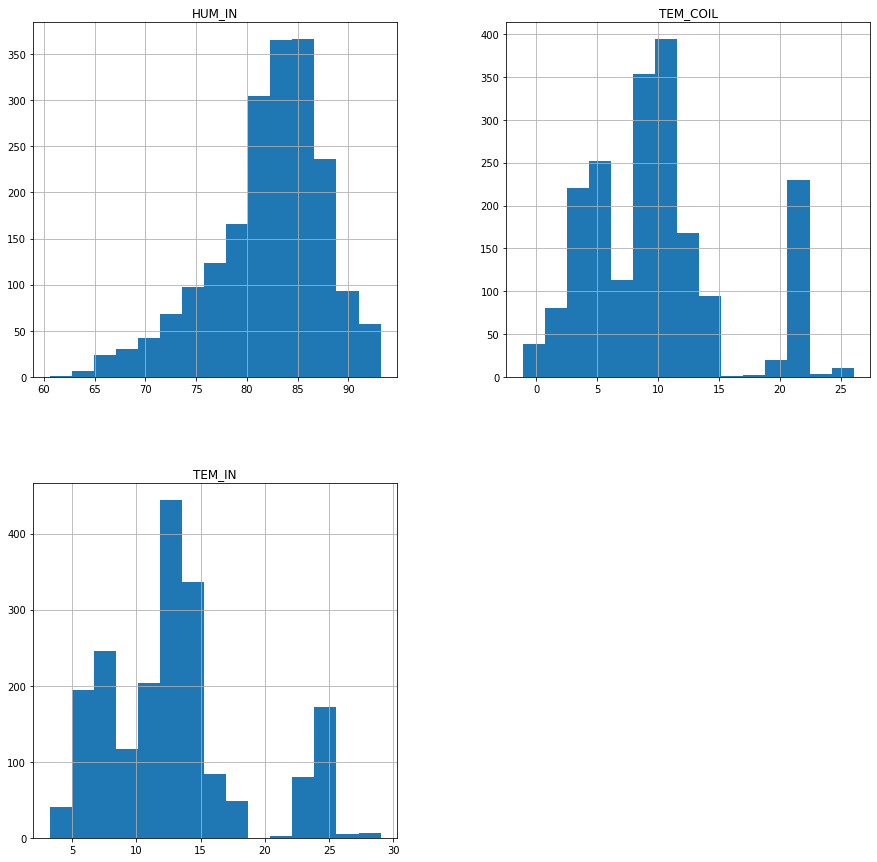

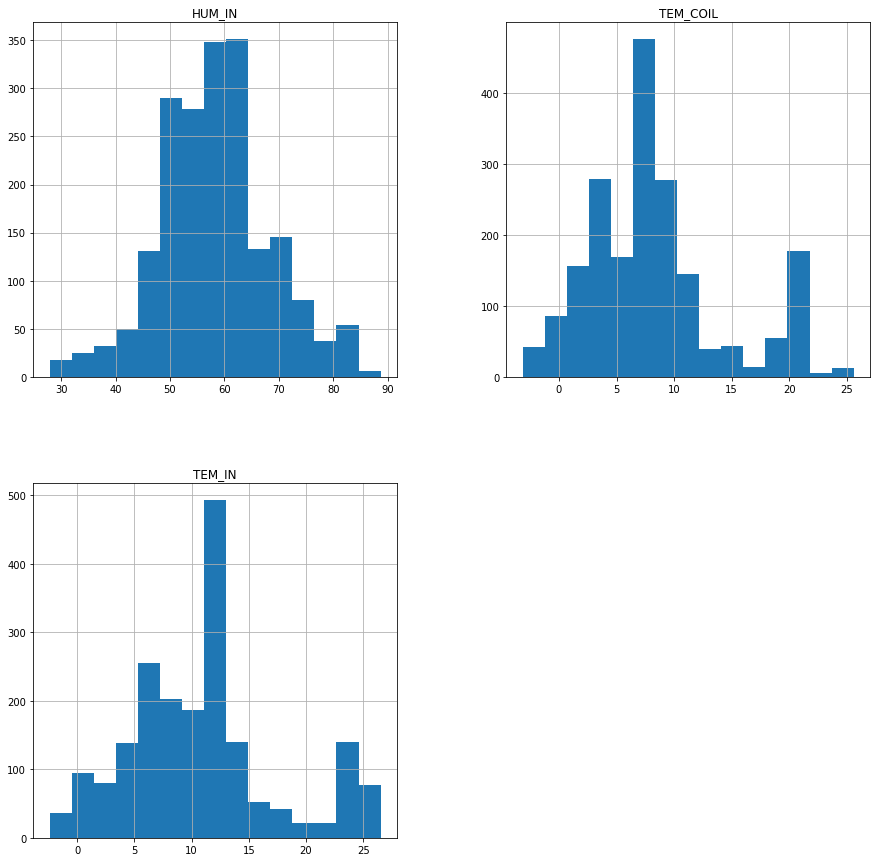

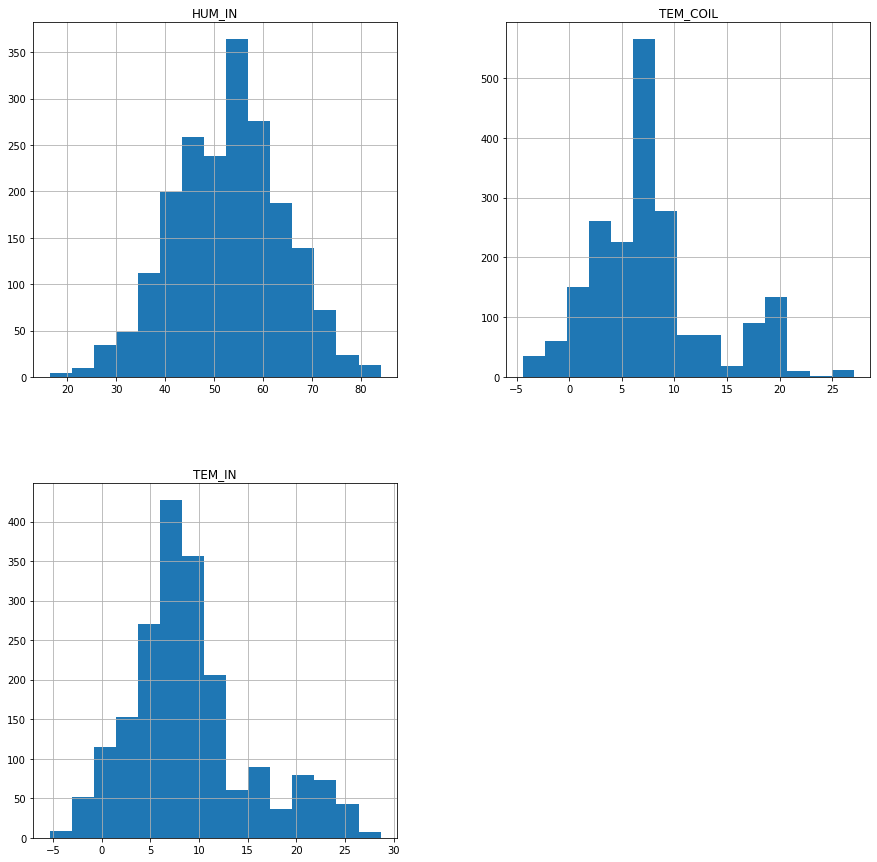

In [20]:
cond.hist(bins=15, figsize=(15, 15))
cond24.hist(bins=15, figsize=(15, 15))
cond48.hist(bins=15, figsize=(15, 15))
plt.show()

## 일반 결로 룰

In [22]:
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,RULL_COND
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,0
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2,2,9.02,38.49,9.68,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,0
349313,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,0
349314,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,0
349315,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,0
